# Introduction

The aim of this case study is to analyse the co2 emissions in all the countries in the world from 1750 to 2022.

In [1]:
import pandas as pd # data processing
import numpy as np # statistics
from skimpy import clean_columns # clean column names

%matplotlib inline
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

df = pd.read_csv("F:\CO2 emission by countries.csv\CO2 emission by countries.csv", encoding = "ISO-8859-1")



# Importing and data processing

**preview data**

In [2]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           55284 non-null  object 
 8   Density(km2)         53116 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


In [3]:
df.head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²


**change column names to snake case and rename**

In [4]:
df = clean_columns(df)
df.columns.tolist()
df.rename(columns = {"co_2_emission_tons":"co2_emission_tons", "density_km_2":"density(km2)", "%_of_world":"percentage_of_world"}, inplace = True)

9 column names have been cleaned

**change string to float**

In [5]:
df["percentage_of_world"] = df["percentage_of_world"].str.replace("%", "", regex=True)
df["percentage_of_world"] = df["percentage_of_world"].astype(float)

df["density(km2)"] = df["density(km2)"].str.replace("/km²", "", regex=True)
df["density(km2)"] = df["density(km2)"].str.replace(',','.', regex=True)
df["density(km2)"] = df["density(km2)"].astype(float)

**Check updated data**

In [6]:
df.head()

,country,code,calling_code,year,co2_emission_tons,population_2022,area,percentage_of_world,density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.4,63.0
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.4,63.0
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.4,63.0
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.4,63.0
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.4,63.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              59620 non-null  object 
 1   code                 57452 non-null  object 
 2   calling_code         56097 non-null  object 
 3   year                 59620 non-null  int64  
 4   co2_emission_tons    59620 non-null  float64
 5   population_2022      53116 non-null  float64
 6   area                 55284 non-null  float64
 7   percentage_of_world  55284 non-null  float64
 8   density(km2)         53116 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 4.1+ MB


# Data analysis and visualization

**Global co2 emission since 1750**

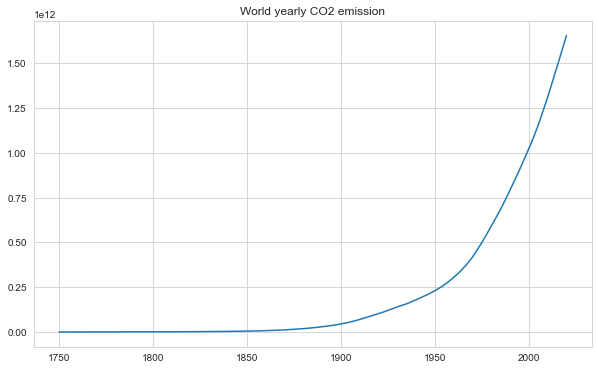

In [8]:
yearly_world_emission_df = df.groupby("year").sum()
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(yearly_world_emission_df.index, yearly_world_emission_df["co2_emission_tons"])
plt.title("World yearly CO2 emission");


We can see from the graph that world co2 emission has been increasing rapidly over the years.

**Now, we will find the top 20 countries in the world with the highest co2 emission for the last 5 years**

In [9]:
top20_emission_df = df[(df.year > 2011) & (df["year"] < 2023)].groupby("country")[["co2_emission_tons"]].sum().sort_values(by=["co2_emission_tons"], ascending=False).head(20)

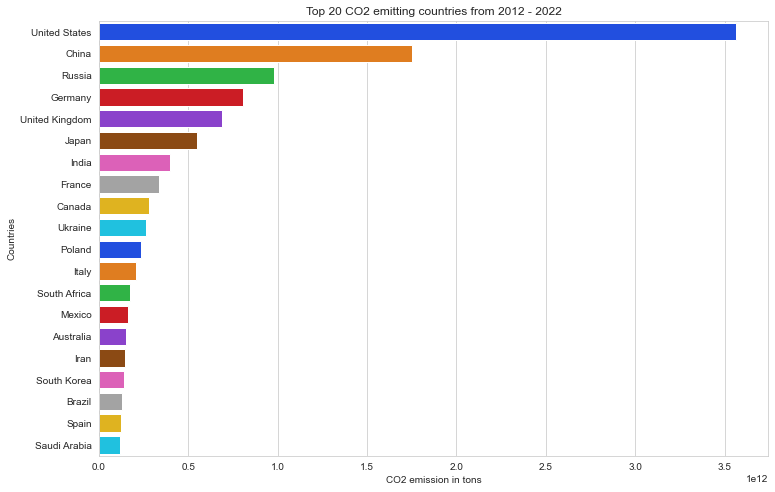

In [10]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(data=top20_emission_df, x="co2_emission_tons", y=top20_emission_df.index, palette="bright")
plt.title("Top 20 CO2 emitting countries from 2012 - 2022")
plt.xlabel("CO2 emission in tons")
plt.ylabel("Countries");


These countries have emitted the highest amount of co2 in the last decade. United States is the largest emitter of co2 in the world for the last decade.

**getting world emission for last 10 years and saving to a new dataframe**

In [11]:
last_decade_emission_df = df[(df.year > 2011) & (df["year"] < 2023)].groupby("country")[["co2_emission_tons"]].sum().sort_values(by=["co2_emission_tons"])

**finding the top 20 countries with the least c02 emission from 2012-2022**

In [12]:
bottom20_emission_df = df[(df.year > 2011) & (df["year"] < 2023)].groupby("country")[["co2_emission_tons"]].sum().sort_values(by=["co2_emission_tons"]).head(20)

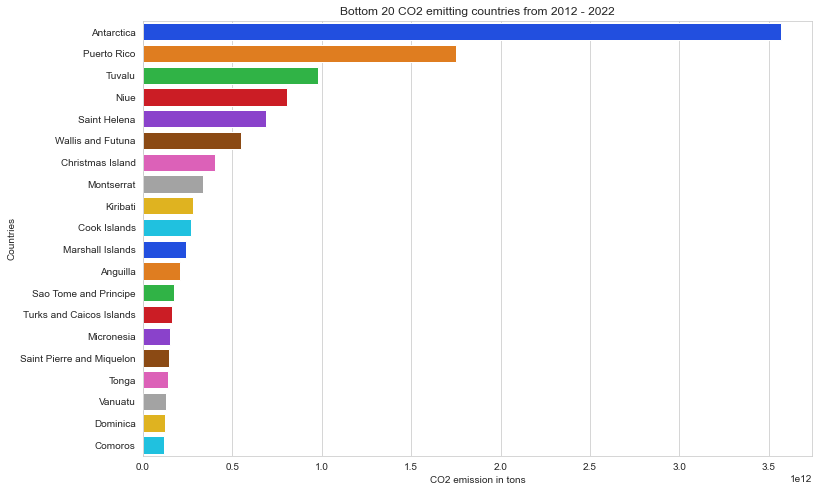

In [13]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(data=top20_emission_df, x="co2_emission_tons", y=bottom20_emission_df.index, palette="bright")
plt.title("Bottom 20 CO2 emitting countries from 2012 - 2022")
plt.xlabel("CO2 emission in tons")
plt.ylabel("Countries");

The plot above shows the 20 countries in the world with the least co2 emission in the world. Comoros has the least c02 emission in the world for the last decade.

**finding the year with the greatest co2 emission from 1750-2020**

In [14]:
print(df.groupby("year")[["co2_emission_tons"]].sum().sort_values(by="co2_emission_tons", ascending=False).head(1))

      co2_emission_tons
year                   
2020       1.654088e+12


**Now let us take a closer look at co2 emission in Nigeria over the years**

In [15]:
c02_nigeria_df = df[df["country"] == "Nigeria"]

view dataset

In [16]:
c02_nigeria_df.head()

,country,code,calling_code,year,co2_emission_tons,population_2022,area,percentage_of_world,density(km2)
38753,Nigeria,NG,234,1750,0.0,218541212.0,923768.0,0.6,237.0
38754,Nigeria,NG,234,1751,0.0,218541212.0,923768.0,0.6,237.0
38755,Nigeria,NG,234,1752,0.0,218541212.0,923768.0,0.6,237.0
38756,Nigeria,NG,234,1753,0.0,218541212.0,923768.0,0.6,237.0
38757,Nigeria,NG,234,1754,0.0,218541212.0,923768.0,0.6,237.0


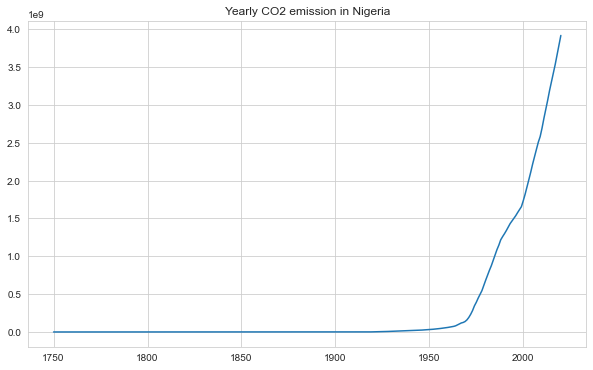

In [17]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(c02_nigeria_df["year"], c02_nigeria_df["co2_emission_tons"])
plt.title("Yearly CO2 emission in Nigeria");

We can see from the chart that c02 emission started to increase around 1960, which coincides with the time Nigeria started production of crudeoil.



From early 2000 till now, there has been an even more increase in co2 emission in Nigeria. This is due to the fact that Nigeria is the largest exporter of crude oil in Africa. Exportation of crude oil is the major source of revenue in the country

**How much percent of total world co2 do top 5 countries emit in 2020**

In [18]:
df[df["year"]==2020].sort_values(by="co2_emission_tons", ascending=False).head(5)["co2_emission_tons"].sum()/df[df["year"]==2020]["co2_emission_tons"].sum()

0.5675616513903374

The top 5 countries with the highest co2 emission constituted 57% of the world co2 in 2020.

**How much of the world population produced 57% of emission in 2020**

In [19]:
df[df["year"]==2020].sort_values(by="co2_emission_tons", ascending=False).head(5)["population_2022"].sum()/df[df["year"]==2020]["population_2022"].sum()

0.26323504999824004

26 percent of the world population produced 57 percent of the world co2 in 2020.

**Since United States produced the highest amount of co2 in the world in 2020. How much co2 was produced per person in USA in 2020?**

In [20]:
usa_2020 = df[(df["year"]==2020) & (df["country"]=="United States")]
usa_2020.head()

,country,code,calling_code,year,co2_emission_tons,population_2022,area,percentage_of_world,density(km2)
57180,United States,US,1,2020,4.170000e+11,338289857.0,9372610.0,6.1,36.0


In [21]:
usa_2020["co2_emission_tons"]/usa_2020["population_2022"]

57180    1232.670715
dtype: float64

The average person in United States emits about 1.2kg of c02 in the year 2020

**Time series of emission for top 5 countries**

In [22]:
top5_df = df[(df["country"]=="United States")|(df["country"]=="China")|(df["country"]=="Russia")|(df["country"]=="Germany")|(df["country"]=="United Kingdom")]
top5_df.head()

,country,code,calling_code,year,co2_emission_tons,population_2022,area,percentage_of_world,density(km2)
10569,China,CN,86,1750,0.0,1.425887e+09,9706961.0,6.3,147.0
10570,China,CN,86,1751,0.0,1.425887e+09,9706961.0,6.3,147.0
10571,China,CN,86,1752,0.0,1.425887e+09,9706961.0,6.3,147.0
10572,China,CN,86,1753,0.0,1.425887e+09,9706961.0,6.3,147.0
10573,China,CN,86,1754,0.0,1.425887e+09,9706961.0,6.3,147.0


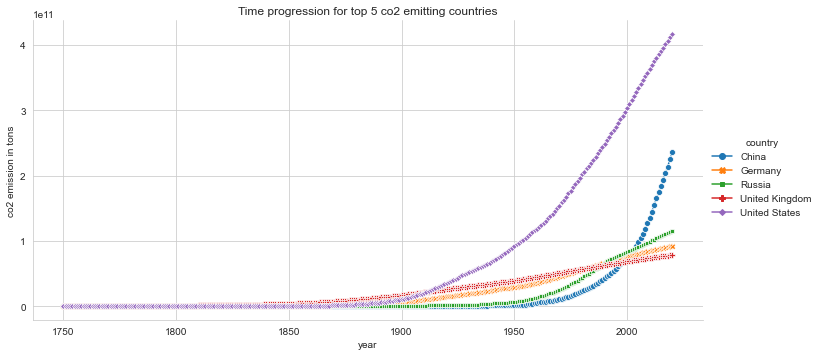

In [23]:
sns.relplot(x = "year", y = "co2_emission_tons", data = top5_df, hue = "country", kind="line", markers=True, dashes=False,height=5, aspect=2, style="country");
plt.title("Time progression for top 5 co2 emitting countries")
plt.ylabel("co2 emission in tons");

**Comparing top 5 co2 emitting countries in year 1750, 1800, 1850, 1900, 1950, 2000, 2010, 2020**

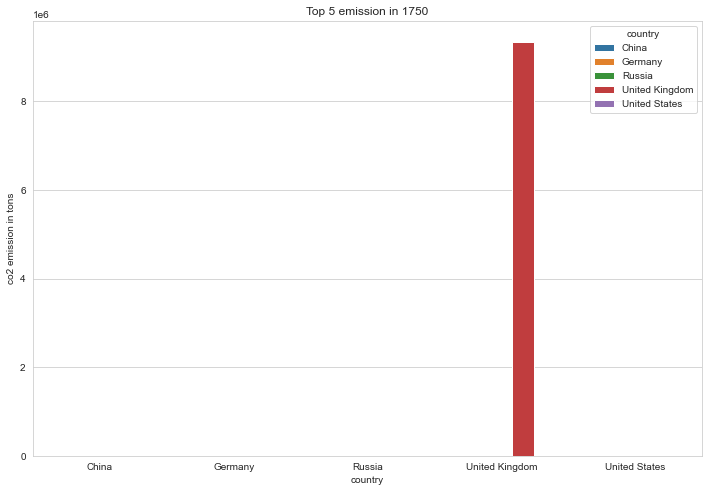

In [24]:
top5_df[top5_df["year"]==1750]
fig = plt.figure(figsize = (12, 8))
sns.barplot(data=top5_df[top5_df["year"]==1750], x="country", y="co2_emission_tons", hue="country")
plt.title("Top 5 emission in 1750")
plt.ylabel("co2 emission in tons");

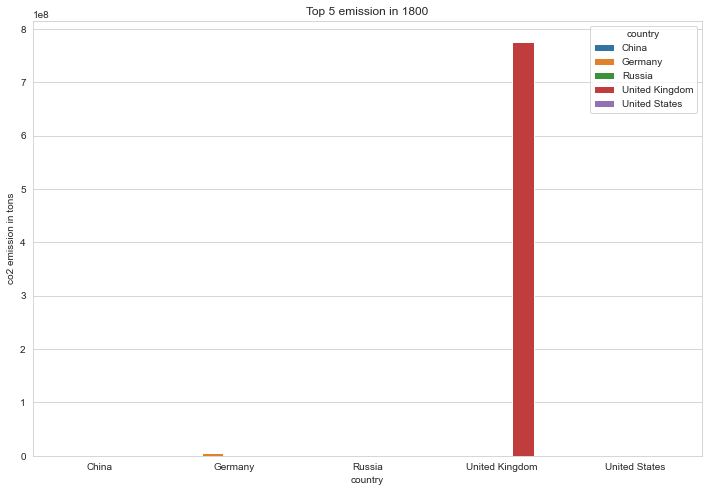

In [25]:
top5_df[top5_df["year"]==18000]
fig = plt.figure(figsize = (12, 8))
sns.barplot(data=top5_df[top5_df["year"]==1800], x="country", y="co2_emission_tons", hue="country")
plt.title("Top 5 emission in 1800")
plt.ylabel("co2 emission in tons");

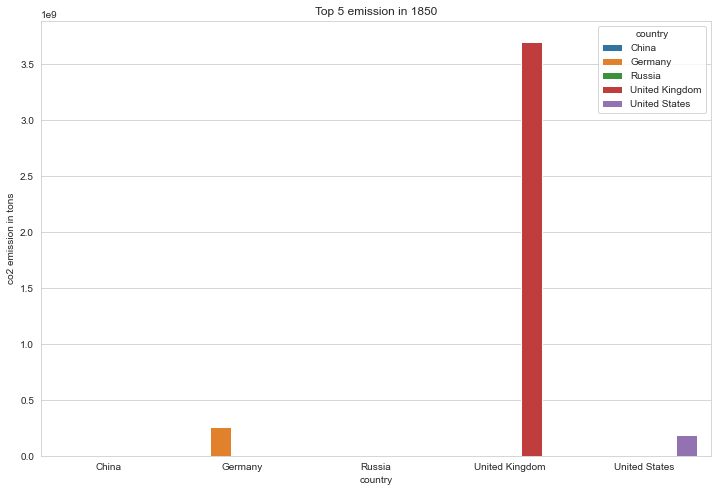

In [26]:
top5_df[top5_df["year"]==1850]
fig = plt.figure(figsize = (12, 8))
sns.barplot(data=top5_df[top5_df["year"]==1850], x="country", y="co2_emission_tons", hue="country")
plt.title("Top 5 emission in 1850")
plt.ylabel("co2 emission in tons");

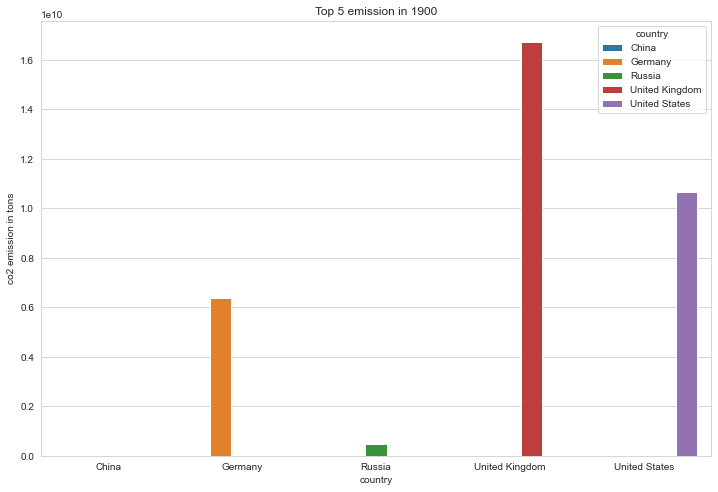

In [27]:
top5_df[top5_df["year"]==1900]
fig = plt.figure(figsize = (12, 8))
sns.barplot(data=top5_df[top5_df["year"]==1900], x="country", y="co2_emission_tons", hue="country")
plt.title("Top 5 emission in 1900")
plt.ylabel("co2 emission in tons");

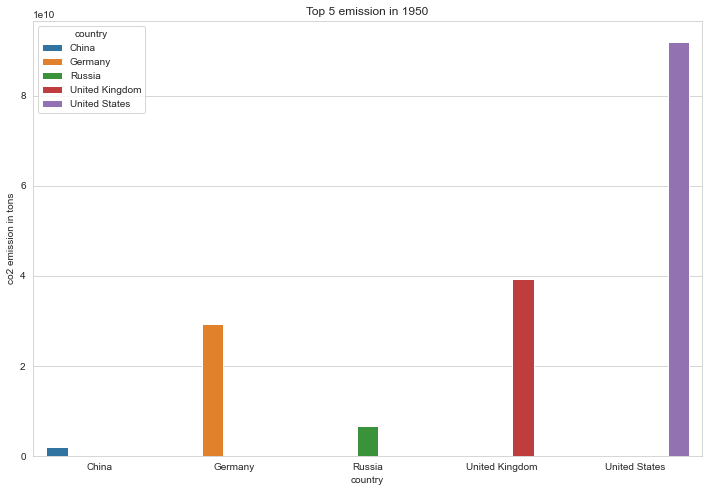

In [28]:
top5_df[top5_df["year"]==1950]
fig = plt.figure(figsize = (12, 8))
sns.barplot(data=top5_df[top5_df["year"]==1950], x="country", y="co2_emission_tons", hue="country")
plt.title("Top 5 emission in 1950")
plt.ylabel("co2 emission in tons");

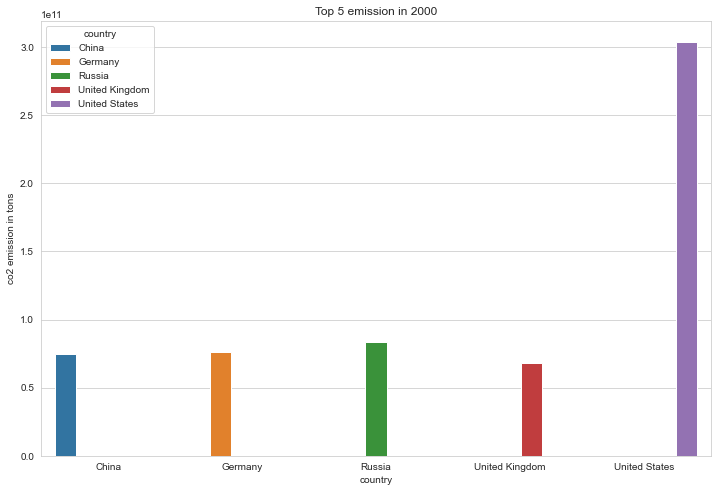

In [29]:
top5_df[top5_df["year"]==2000]
fig = plt.figure(figsize = (12, 8))
sns.barplot(data=top5_df[top5_df["year"]==2000], x="country", y="co2_emission_tons", hue="country")
plt.title("Top 5 emission in 2000")
plt.ylabel("co2 emission in tons");

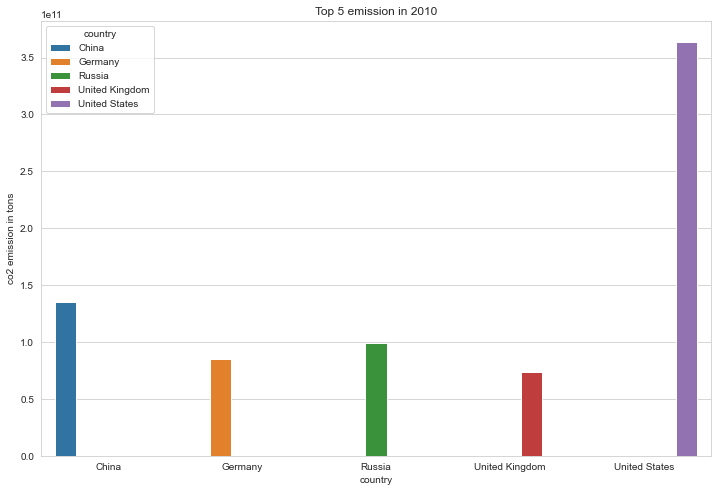

In [30]:
top5_df[top5_df["year"]==2010]
fig = plt.figure(figsize = (12, 8))
sns.barplot(data=top5_df[top5_df["year"]==2010], x="country", y="co2_emission_tons", hue="country")
plt.title("Top 5 emission in 2010")
plt.ylabel("co2 emission in tons");

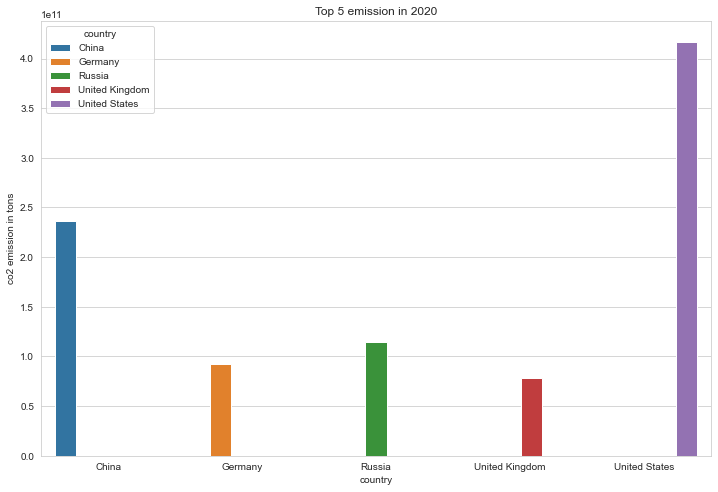

In [31]:
top5_df[top5_df["year"]==2020]
fig = plt.figure(figsize = (12, 8))
sns.barplot(data=top5_df[top5_df["year"]==2020], x="country", y="co2_emission_tons", hue="country")
plt.title("Top 5 emission in 2020")
plt.ylabel("co2 emission in tons");

From the charts above, we can see that co2 emission in United Kingdom has steadily been on a decline over the years. This reduction in co2 emission seems to be due to the Climate Change Act established by the UK government. 



Also, co2 emission has increased steadily in United States, China, Russia and Germany, with United States having the highest increase in co2 emission over the years. 